In [1]:
import re

import pandas as pd
import numpy as np
import os

import seaborn as sns
from matplotlib import pyplot as plt


## Concatenate Dataset into one File

In [2]:
from typing import List, Dict


def eraseSpace(directory: str):
    files = getFileNameFromDir(direc=directory)
    for file in files:
        realFile = open("{}/{}".format(directory, file), mode="r", encoding="UTF-8")
        data = [f for f in realFile if f.strip()]
        realFile.close()
        realFile = open("{}/{}".format(directory, file), mode="w", encoding="UTF-8")
        realFile.writelines(data)
        realFile.close()


def getFileNameFromDir(direc: str) -> List[str]:
    return [f for f in os.listdir("{}/".format(direc))]


def restructureFile(direcToScan: str, f: str):
    data = pd.read_csv("{}/{}".format(direcToScan, f), encoding="UTF-8")
    data.rename(columns=({"Questions": "Question", "Intents": "Intent"}), inplace=True)
    print(f)
    data["Question"].dropna(inplace=True)
    if data.isnull().any().any():
        print(data.columns())
        print(data.isna().sum())
        print(data.head())

    data.to_csv("{}/{}".format(direcToScan, f), encoding="UTF-8", index=False)
    return data


def myConcat(direcToScan: str, outputFilename: str, outputDirec: str = "all_data"):
    files = getFileNameFromDir(direc=direcToScan)

    datasets = pd.concat([restructureFile(direcToScan=direcToScan, f=f) for f in files], axis=0, ignore_index=True)

    datasets.to_csv("{}/{}.csv".format(outputDirec, outputFilename), index=False)

In [3]:
## Concatenate All Dataset into one File
myConcat(direcToScan="datasets", outputFilename="all_data_dataset")

## Concatenate All Entity-tag Dataset into one File
myConcat(direcToScan="entity-tag", outputFilename="all_entity_dataset")

## Concatenate All Segmentation Dataset into one File
myConcat(direcToScan="segments", outputFilename="all_segment_dataset")

## Concatenate All Segmentation Dataset into one File
myConcat(direcToScan="POS/", outputFilename="all_pos_dataset")

AskAboutAcademicFee.csv
AskAboutAge.csv
AskAboutClubInfo.csv
AskAboutCompetition.csv
AskAboutInterest.csv
AskAboutLocation.csv
AskAboutMinistry.csv
AskAboutParkingPrice.csv
AskAboutProvince.csv
AskAboutSchoolMajors.csv
AskWhereHRRoomIs.csv
FindAnnouncementInfo.csv
FindClub.csv
FindClubRoom.csv
FindCSInfo.csv
FindCurrentTime.csv
FindECInfo.csv
FindTNInfo.csv
FindTotalStudents.csv
IsMinistryExist.csv
IsProvinceExist.csv
ListClub.csv
ListParkingSpace.csv
AskAboutAcademicFee.csv
AskAboutAge.csv
AskAboutClubInfo.csv
AskAboutCompetition.csv
AskAboutInterest.csv
AskAboutLocation.csv
AskAboutMinistry.csv
AskAboutParkingPrice.csv
AskAboutProvince.csv
AskAboutSchoolMajors.csv
AskWhereHRRoomIs.csv
FindAnnouncementInfo.csv
FindClub.csv
FindClubRoom.csv
FindCSInfo.csv
FindCurrentTime.csv
FindECInfo.csv
FindTNInfo.csv
FindTotalStudents.csv
IsMinistryExist.csv
IsProvinceExist.csv
ListClub.csv
ListParkingSpace.csv
AskAboutAcademicFee.csv
AskAboutAge.csv
AskAboutClubInfo.csv
AskAboutCompetition.csv
Ask

## Erase blank from files

In [4]:
try:
    eraseSpace(directory="datasets")
    eraseSpace(directory="entity-tag")
    eraseSpace(directory="POS")
    eraseSpace(directory="segments")
    print("Success")
except:
    print("fail")


Success


## Check for any null or space data

In [32]:
def checkNullOrSpace():
    count: int = 0
    checkDict: Dict[str, List[str]] = {
        "datasets": getFileNameFromDir("datasets"),
        "segments": getFileNameFromDir("segments"),
        "pos": getFileNameFromDir("pos"),
        "entity-tag": getFileNameFromDir("entity-tag"),
    }

    for direc, v in checkDict.items():
        for filename in v:
            data = pd.read_csv("{}/{}".format(direc, filename))
            if data.isnull().any().any():
                print("{} file of direc {} have null at:".format(filename, direc))
                print(data[data["Question"].isnull()])
                count += 1

    if count == 0:
        print("No null sentence in any files detected")


checkNullOrSpace()

AskAboutSchoolMajors.csv file of direc datasets have null at:
    Question                Intent
852      NaN  AskAboutSchoolMajors


## Compare Ner length, POS length, and SEG Length

In [5]:
from pandas import DataFrame


def findDiffLengthSentence(allSegDataset: DataFrame, allEntityDataset: DataFrame, allPosDataset: DataFrame):
    myTempDict = {}
    indexs = allEntityDataset.index.tolist()
    segs = allSegDataset["Question"].to_list()
    tags = allSegDataset["Intent"].to_list()
    ents = allEntityDataset["Question"].to_list()
    poss = allPosDataset["Question"].to_list()

    for seg, tag, ent, pos, index in zip(segs, tags, ents, poss, indexs):
        if len(str(seg).split()) is not len(str(pos).split()) is not len(str(ent).split()):
            myTempDict.setdefault("index", []).append(index)
            myTempDict.setdefault("intent", []).append(tag)
            myTempDict.setdefault("length_seg", []).append(len(str(seg).split()))
            myTempDict.setdefault("length_pos", []).append(len(str(pos).split()))
            myTempDict.setdefault("length_ent", []).append(len(str(ent).split()))
            myTempDict.setdefault("seg", []).append(seg)
            myTempDict.setdefault("pos", []).append(pos)
            myTempDict.setdefault("ent", []).append(ent)

    errorPd = pd.DataFrame.from_dict(myTempDict)
    errorPd.to_csv("all_data/diff_length_sentences.csv", index=False)

In [6]:
temp = pd.read_csv("POS/AskWhereHRRoomIs.csv")
# temp.head()
temp.isna().sum()

Question    0
Intent      0
dtype: int64

In [7]:
allSegFileName = getFileNameFromDir(direc="segments")
# allPosFileName = getFileNameFromDir(direc="pos")
# allEntityFileName = getFileNameFromDir(direc="entity-tag")

myTempDict = {}

# Loop Through each file name to read csv
for file in allSegFileName:
    file = file.replace(" ", "")
    allEntityDataset = pd.read_csv("entity-tag/{}".format(file))
    allPosDataset = pd.read_csv("POS/{}".format(file))
    allSegDataset = pd.read_csv("segments/{}".format(file))

    indexs = allEntityDataset.index.tolist()
    segs = allSegDataset["Question"].to_list()
    tags = allSegDataset["Intent"].to_list()
    ents = allEntityDataset["Question"].to_list()
    poss = allPosDataset["Question"].to_list()

    # loop through the csv to find wrong sentence length
    for seg, tag, ent, pos, index in zip(segs, tags, ents, poss, indexs):
        if len(str(seg).split()) is not len(str(pos).split()) is not len(str(ent).split()):
            myTempDict.setdefault("index", []).append(index)
            myTempDict.setdefault("intent", []).append(tag)
            myTempDict.setdefault("length_seg", []).append(len(str(seg).split()))
            myTempDict.setdefault("length_pos", []).append(len(str(pos).split()))
            myTempDict.setdefault("length_ent", []).append(len(str(ent).split()))
            myTempDict.setdefault("seg", []).append(seg)
            myTempDict.setdefault("pos", []).append(pos)
            myTempDict.setdefault("ent", []).append(ent)
            print("seg", seg)
            print("pos", pos)
            print("ent", ent)

errorPd = pd.DataFrame.from_dict(myTempDict)
errorPd.to_csv("all_data/diff_length_sentences.csv", index=False)

In [8]:
from pandas.errors import EmptyDataError

try:
    wrongSentence = pd.read_csv("all_data/diff_length_sentences.csv")

    print("length_seg: ", wrongSentence["length_seg"].count())
    print("length_pos: ", wrongSentence["length_pos"].count())
    print("length_ent: ", wrongSentence["length_ent"].count())
    print("seg: ", wrongSentence["seg"].count())
    print("pos: ", wrongSentence["pos"].count())
    print("ent: ", wrongSentence["ent"].count())

    print(wrongSentence)
except EmptyDataError:
    print("No Wrong Length Sentences")


No Wrong Length Sentences


## Find Amount of Sentences per intent as well as Total

In [9]:
## Find Amount of Sentences
allDataset = pd.read_csv("all_data/all_data_dataset.csv")
allDataset.head()

,Question,Intent
0,តើប្រាប់ពីតម្លៃសិក្សារបស់សាលាស៉ីអេឌីធី,AskAboutAcademicFee
1,តើប្រាប់ពីតម្លៃសិក្សារបស់សាលាCADT,AskAboutAcademicFee
2,តើខ្ញុំចង់ដឹងពីតម្លៃពីតម្លៃសិក្សារបស់សាលាស៉ីអេ...,AskAboutAcademicFee
3,តើខ្ញុំចង់ដឹងពីតម្លៃពីតម្លៃសិក្សារបស់សាលាCADT,AskAboutAcademicFee
4,តើសូមប្រាប់ខ្ញុំពីតម្លៃសិក្សារបស់សាលាស៉ីអេឌីធី,AskAboutAcademicFee


In [10]:
# For used to get Gradient color set

def getPalleteAndArrangeValue(color: str, size):
    pal = sns.color_palette(color, len(size))

    # First sort of list
    rank = dataCount.argsort()

    # Second sort where we can now define which should have the brightest color
    proper = rank.argsort()

    # Convert the tuple to a list, also to arrange the the color according to the size of each index of the list
    aray = np.array(pal)[proper]
    return aray

## Find sentences total per intent and Draw BarPlot

Intent
AskAboutAcademicFee       78
AskAboutAge              120
AskAboutClubInfo          63
AskAboutCompetition      144
AskAboutInterest         120
AskAboutLocation         176
AskAboutMinistry         105
AskAboutParkingPrice      96
AskAboutProvince         138
AskAboutSchoolMajors     852
AskWhereHRRoomIs        2520
FindAnnouncementInfo      24
FindCSInfo               512
FindClub                  63
FindClubRoom             105
FindCurrentTime         1770
FindECInfo               500
FindTNInfo               512
FindTotalStudents        504
IsMinistryExist          336
IsProvinceExist          138
ListClub                  48
ListParkingSpace          81
dtype: int64
-------------------------


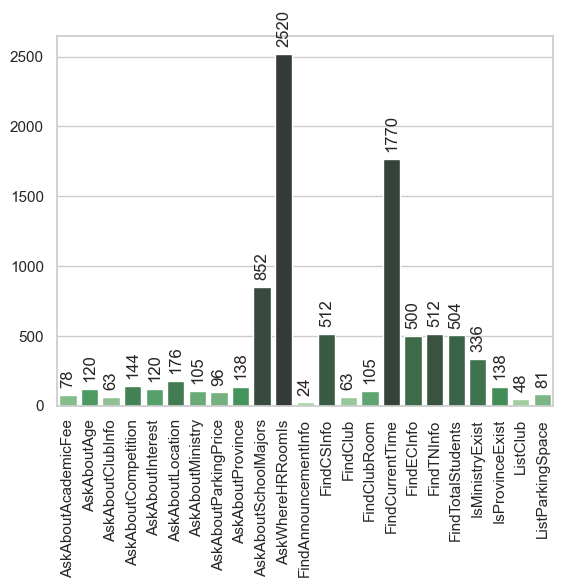

In [33]:
# plt.figure(figsize=(16,8))
sns.set(style="whitegrid", color_codes=True)

dataCount = allDataset.groupby("Intent").size()


aray = getPalleteAndArrangeValue(color="Greens_d", size=dataCount)

ax = sns.barplot(x=dataCount.index.tolist(), y=dataCount.values.tolist(), palette=aray)

plt.bar_label(ax.containers[0], padding=5, rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

print(dataCount)
print("-------------------------")
plt.show()

In [12]:
# Find Total
print("Total Sentence length: ", allDataset.Question.count())

Total Sentence length:  9005


## Check amount of entities as well as for any errors

In [13]:
entityDataFrame = pd.read_csv("all_data/all_entity_dataset.csv")
entityFrame = pd.read_csv("Named Entity.csv")
entityFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Named Entity  16 non-null     object
 1   NE Code       16 non-null     object
 2   Remarks       14 non-null     object
dtypes: object(3)
memory usage: 512.0+ bytes


In [14]:
# Remove white space from column name and apply it to csv file
# TODO: This is still experimenting, use with caution

# entityFrame = entityFrame.rename(columns={entityFrame.columns.values[1]: "Question"})
# entityFrame.to_csv("Named Entity.csv", index=False)

In [15]:
# Check total amount of entity number
myDict = {}
entityTag = entityFrame["NE Code"].to_list()
entitySentences = entityDataFrame["Question"].to_list()

for x in entityTag:
    count = 0
    for j in entitySentences:
        sentence = j.split()
        for c in range(len(sentence)):
            # Matches /B-Word until space
            if re.search(r"/B-{}\w*".format(x), sentence[c]):
                count += 1
                split = sentence[c].rsplit("/B-", maxsplit=1)[1]
                myDict.update({split: count})

entityAmount = pd.DataFrame(myDict.items(), columns=["Intent", "Amount"])
# entityAmount
myDict

{'ROOM': 2520,
 'BUILD': 48,
 'PER': 3735,
 'GPE': 669,
 'ORG': 2559,
 'MAJOR': 1524,
 'MAJORរៀន': 1142,
 'MAJORសិក្សា': 1253}

In [16]:
## Calculate the percentage

# Sum of Intent
totalIntentTag = sum(myDict[x] for x in myDict)
rise = ["{0:.2f}%".format(myDict[x] * 100 / totalIntentTag) for x in myDict]

entityAmount["Percentage"] = rise
entityAmount

,Intent,Amount,Percentage
0,ROOM,2520,18.74%
1,BUILD,48,0.36%
2,PER,3735,27.77%
3,GPE,669,4.97%
4,ORG,2559,19.03%
5,MAJOR,1524,11.33%
6,MAJORរៀន,1142,8.49%
7,MAJORសិក្សា,1253,9.32%


## Count each word occurence